In [53]:
import pandas as pd
import os
import pymongo
import json
import matplotlib.pyplot as plt
import numpy as np


In [54]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client["project2"]
for x in os.listdir("this_one"):
    df = pd.read_csv(f'this_one/{x}')
    x = x.replace(" ", "_")[:len(x)-4]
    collist = db.list_collection_names()
    records = json.loads(df.T.to_json()).values()
    if x not in collist:
        db[x].insert_many(records)

In [55]:
for x in db.list_collection_names():
    df = pd.DataFrame(list(db[x].find()))
    del df['_id']
# print(db.list_collection_names())
# data = list(db["texas_combined_completed_data"].find())
# print(json.dumps(data, default=str, indent=4))
df = pd.DataFrame(list(db["texas_combined_completed_data"].find()))
del df['_id']
print(df.columns)

Index(['Last_Update', 'Province_State', 'Confirmed', 'Deaths', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'People_Fully_Vaccinated', 'People_Partially_Vaccinated'],
      dtype='object')


In [56]:

death_rate = []
vaccinated_rate = []
for x in range(len(df["Deaths"]) - 1):
    death_rate.append(float(df["Deaths"].tolist()[x + 1] - df["Deaths"].tolist()[x]))
    vaccinated_rate.append(df["People_Fully_Vaccinated"].tolist()[x + 1] - df["People_Fully_Vaccinated"].tolist()[x])
print(death_rate)
print(vaccinated_rate)


[459.0, 451.0, 439.0, 344.0, 186.0, 179.0, 330.0, 457.0, 415.0, 358.0, 274.0, 150.0, 171.0, 374.0, 420.0, 414.0, 440.0, 289.0, 140.0, 160.0, 317.0, 349.0, 387.0, 366.0, 248.0, 124.0, 63.0, 50.0, 110.0, 134.0, 202.0, 209.0, 121.0, 139.0, 220.0, 310.0, 254.0, 291.0, 143.0, 178.0, 212.0, 277.0, 277.0, 294.0, 290.0, 202.0, 66.0, 96.0, 171.0, 214.0, 211.0, 222.0, 137.0, 57.0, 96.0, 132.0, 176.0, 198.0, 173.0, 100.0, 48.0, 100.0, 81.0, 162.0, 133.0, 125.0, 92.0, 54.0, 41.0, 108.0, 10.0, 243.0, 104.0, 77.0, 21.0, 32.0, 86.0, 103.0, 99.0, 104.0, 67.0, 24.0, 19.0, 58.0, 70.0, 82.0, 69.0, 52.0, 33.0, 23.0, 54.0, 76.0, 70.0, 59.0, 44.0, 15.0, 31.0, 60.0, 71.0, 66.0, 55.0, 55.0, 16.0, 41.0, 80.0, 60.0, 56.0, 56.0, 43.0, 17.0, 22.0, 54.0, 66.0, 55.0, 63.0, 37.0, 1.0, 31.0, 40.0, 69.0, 47.0, 42.0, 39.0, 16.0, 24.0, 39.0, 62.0, 51.0, 55.0, 35.0, 14.0, 3.0, 17.0, 50.0, 58.0, 43.0, 25.0, 18.0, 17.0, 41.0, 37.0, 32.0, 43.0, 23.0, 17.0, 11.0, 27.0, 40.0, 33.0, 43.0, 15.0, 12.0, 8.0, 32.0, 33.0, 34.0, 29.

In [57]:
print(len(df))
# plt.bar(death_rate, vaccinated_rate)
# plt.show()
dr_weekly = []
vr_weekly = []
for x in range(0, 273, 7):
    dr = death_rate[x]
    vr = vaccinated_rate[x]
    for y in range(1, 7):
        dr += death_rate[x+y]
        vr += vaccinated_rate[x+y]
    dr_weekly.append(dr / 7)
    vr_weekly.append(vr / 7)
print(dr_weekly)
print(vr_weekly)

279
[341.14285714285717, 314.14285714285717, 311.42857142857144, 226.71428571428572, 162.14285714285714, 237.85714285714286, 199.42857142857142, 152.71428571428572, 125.14285714285714, 102.14285714285714, 81.85714285714286, 67.71428571428571, 54.714285714285715, 50.714285714285715, 54.857142857142854, 44.0, 41.857142857142854, 39.42857142857143, 33.857142857142854, 36.0, 27.142857142857142, 26.142857142857142, 22.571428571428573, 28.285714285714285, 26.285714285714285, 25.0, 30.428571428571427, 45.285714285714285, 62.285714285714285, 92.42857142857143, 153.0, 213.57142857142858, 227.71428571428572, 255.0, 282.7142857142857, 293.42857142857144, 266.0, 106.28571428571429, 320.2857142857143]
[17411.85714285714, 32127.428571428572, 45322.857142857145, 53057.142857142855, 39579.57142857143, 81960.0, 56713.142857142855, 62720.71428571428, 46693.28571428572, 90680.14285714286, 133292.42857142858, 152968.7142857143, 123898.14285714286, 111035.0, 105088.42857142857, 102174.85714285714, 89039.85

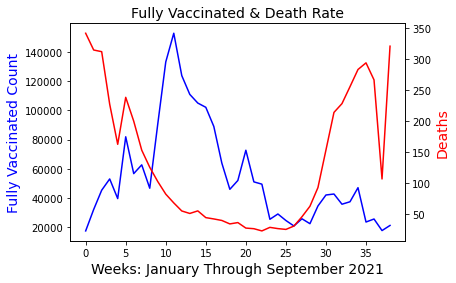

In [58]:
fig,ax = plt.subplots()
ax.plot(
    np.arange((len(vr_weekly))),
    vr_weekly, color="blue")
#plt.plot
ax2=ax.twinx()
ax2.plot(
    np.arange(len(dr_weekly)),
    dr_weekly, color="red"
)

ax.set_ylabel("Fully Vaccinated Count", color="blue",fontsize=14)
ax2.set_ylabel("Deaths",color="red",fontsize=14)
plt.title("Fully Vaccinated & Death Rate", fontsize=14)
ax.set_xlabel("Weeks: January Through September 2021", fontsize=14)
plt.show()

In [59]:
df = pd.DataFrame(list(db["texas_combined_completed_data"].find()))
del df['_id']
print(df.columns)

Index(['Last_Update', 'Province_State', 'Confirmed', 'Deaths', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'People_Fully_Vaccinated', 'People_Partially_Vaccinated'],
      dtype='object')


In [60]:
part_vac = []
full_vac = []
for x in range(len(df["People_Fully_Vaccinated"]) - 1):
    part_vac.append(float(df["People_Partially_Vaccinated"].tolist()[x + 1] - df["People_Partially_Vaccinated"].tolist()[x]))
    full_vac.append(df["People_Fully_Vaccinated"].tolist()[x + 1] - df["People_Fully_Vaccinated"].tolist()[x])
print(part_vac)
print(full_vac)

[36673.0, 50003.0, 40585.0, 20939.0, 18568.0, 50701.0, 11399.0, 33738.0, 32346.0, 44326.0, 14642.0, 39346.0, 0.0, 33299.0, 37259.0, 27769.0, 49837.0, 47686.0, 21308.0, 40130.0, 32536.0, 6203.0, 13189.0, -481.0, 13104.0, 0.0, 11950.0, -11879.0, 1102.0, 62843.0, -158.0, -8127.0, -1618.0, -26955.0, -17504.0, -55119.0, -8066.0, 18616.0, 14101.0, 4696.0, 22537.0, 2244.0, 31033.0, 82896.0, 68491.0, 34727.0, -22091.0, 99660.0, 87877.0, 93110.0, 113953.0, 107527.0, 73401.0, 52872.0, 61099.0, 105334.0, 116899.0, 94945.0, 90469.0, 66025.0, 21490.0, 39608.0, -20043.0, 82667.0, 72127.0, 18124.0, 23638.0, 39941.0, 17914.0, 30821.0, -8565.0, -792.0, 19096.0, 22760.0, 44297.0, -6789.0, 15085.0, -838.0, 30900.0, 22442.0, 2207.0, -776.0, 11961.0, 15667.0, -16079.0, -10191.0, 27210.0, 16151.0, -3802.0, -12463.0, -17035.0, -60054.0, -49942.0, -30654.0, -33715.0, -15256.0, -19340.0, -41339.0, -59260.0, -78183.0, -62707.0, -42135.0, -16921.0, -21877.0, -63669.0, -65015.0, -88104.0, -68838.0, -71037.0, -348

279
[254142.0, 242198.0, 216515.0, 188630.0, 209646.0, 237853.0, 187196.0, 198136.0, 196305.0, 213198.0, 166957.0, 226856.0, 195850.0, 250457.0, 261248.0, 247035.0, 247537.0, 208738.0, 134193.0, 144811.0, 97087.0, 50168.0, 39072.0, 13315.0, 90224.0, 63858.0, 67681.0, 30284.0, 28189.0, 71324.0, -109639.0, -125516.0, -92264.0, -101882.0, -60780.0, -58354.0, 46062.0, 111843.0, 171608.0, 216593.0, 264465.0, 199544.0, 325749.0, 434456.0, 430265.0, 441963.0, 457945.0, 675188.0, 616617.0, 595072.0, 628139.0, 624659.0, 577951.0, 574490.0, 595870.0, 600496.0, 546335.0, 387439.0, 370685.0, 327899.0, 235463.0, 255729.0, 196411.0, 337078.0, 274692.0, 139997.0, 126595.0, 138356.0, 99148.0, 138438.0, 61442.0, 92865.0, 112707.0, 128175.0, 149394.0, 56218.0, 84105.0, 65058.0, 113301.0, 57864.0, 4996.0, 27016.0, 56680.0, 44623.0, -15253.0, -10321.0, -22783.0, -110994.0, -177752.0, -216326.0, -223691.0, -269015.0, -240188.0, -230218.0, -280808.0, -291341.0, -322304.0, -341884.0, -340343.0, -363675.0, -3

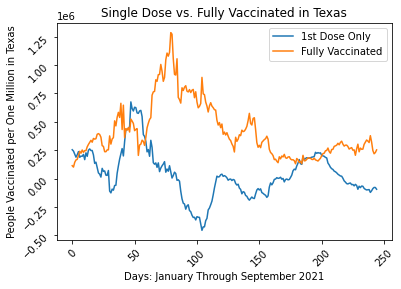

In [61]:
# show graph
print(len(df))
# plt.bar(part_vac, full_vac)
# plt.show()
pv_weekly = []
fv_weekly = []
for x in range(0, 245):
    pv = part_vac[x]
    fv = full_vac[x]
    for y in range(0, 6):
        pv += part_vac[x+y]
        fv += full_vac[x+y]
    pv_weekly.append(pv)
    fv_weekly.append(fv)
print(pv_weekly)
print(fv_weekly)
plt.plot(
    np.arange((len(pv_weekly))),
    pv_weekly, label="1st Dose Only"
)
plt.plot(
    np.arange(len(fv_weekly)),
    fv_weekly, label="Fully Vaccinated"
)

plt.legend(ncol=1, loc="upper right")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Single Dose vs. Fully Vaccinated in Texas")
plt.xlabel("Days: January Through September 2021")
plt.ylabel("People Vaccinated per One Million in Texas")
plt.show()

In [62]:
df = pd.DataFrame(list(db["Vaccinations_County_Stats_-_Public_Share"].find()))
print(df.columns)

Index(['_id', 'ObjectId', 'Category', 'Category_Description',
       'General_Population', 'At_Least_One_Dose', 'Fully_Vaccinated', 'Note',
       'Date'],
      dtype='object')


In [63]:
df.head(20)
df

,_id,ObjectId,Category,Category_Description,General_Population,At_Least_One_Dose,Fully_Vaccinated,Note,Date
0,61b52650bcef8b3177cc1fba,1,5Cat Age Groups,16+,1506216.0,928327,647489,VA and DOD data included,2021/05/03 05:00:00+00
1,61b52650bcef8b3177cc1fbb,2,5Cat Age Groups,18+,1450476.0,913489,641399,VA and DOD data included,2021/05/03 05:00:00+00
2,61b52650bcef8b3177cc1fbc,3,5Cat Age Groups,18-49,898710.0,386006,254338,VA and DOD data not included,2021/05/03 05:00:00+00
3,61b52650bcef8b3177cc1fbd,4,5Cat Age Groups,50-64,320289.0,213275,160085,VA and DOD data not included,2021/05/03 05:00:00+00
4,61b52650bcef8b3177cc1fbe,5,5Cat Age Groups,65+,231377.0,188647,152643,VA and DOD data not included,2021/05/03 05:00:00+00
...,...,...,...,...,...,...,...,...,...
624,61b52650bcef8b3177cc222a,625,MultiCat Age Groups,60-64,NaN,92535,83119,VA and DOD data not included,2021/10/20 05:00:00+00
625,61b52650bcef8b3177cc222b,626,MultiCat Age Groups,65-75,NaN,155300,138929,VA and DOD data not included,2021/10/20 05:00:00+00
626,61b52650bcef8b3177cc222c,627,MultiCat Age Groups,76-85,NaN,62874,55049,VA and DOD data not included,2021/10/20 05:00:00+00
627,61b52650bcef8b3177cc222d,628,MultiCat Age Groups,86-95,NaN,19958,17269,VA and DOD data not included,2021/10/20 05:00:00+00


In [78]:
age_groups_df = df.loc[df["Category"] == "5Cat Age Groups"]
age_groups = age_groups_df["Category_Description"].unique()
temp=0
for i in range(0, len(age_groups)):    
    for j in range(i+1, len(age_groups)):    
        if(age_groups[i] > age_groups[j]):    
            temp = age_groups[i];    
            age_groups[i] = age_groups[j];    
            age_groups[j] = temp;    
group_sum = [age_groups_df[age_groups_df["Category_Description"] == x]["Fully_Vaccinated"].sum() for x in age_groups]
age_groups
#x_axis = group_sum

array(['12+', '16+', '18+', '18-49', '50-64', '65+'], dtype=object)

In [79]:
one_dose_sum = [age_groups_df[age_groups_df["Category_Description"] == x]["At_Least_One_Dose"].sum() for x in age_groups]
one_dose_sum

[30002048, 30758955, 30007004, 13852343, 6931006, 6044745]

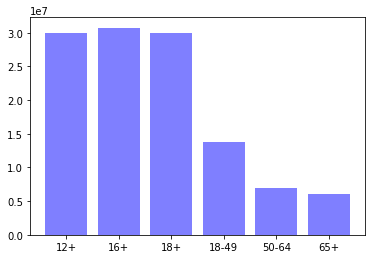

In [80]:

plt.bar(age_groups, one_dose_sum, color='b', alpha=0.5, align="center")
plt.show()

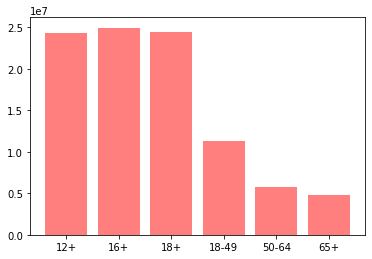

In [81]:
plt.bar(age_groups, group_sum, color='r', alpha=0.5, align="center")
plt.show()

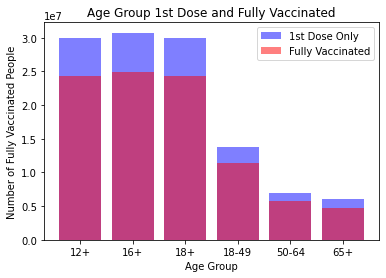

In [83]:

width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(age_groups, one_dose_sum, color='b', alpha=0.5, align="center", label="1st Dose Only")
ax.bar(age_groups, group_sum, color='r', alpha=0.5, align="center", label="Fully Vaccinated" )
ax.set_xlabel("Age Group")
ax.set_ylabel('Number of Fully Vaccinated People')
ax.set_title('Age Group 1st Dose and Fully Vaccinated')
plt.legend(ncol=1, loc="upper right")
plt.show()